In [5]:
import csv

# Open and read the CSV file
with open('Great Lakes Data/daily_preciptiation.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Skip the first 9 rows (header rows)
    for _ in range(9):  
        next(reader)
    
    # Initialize variables for weekly data
    count = 0
    weekly_precipitation = {}
    week_start_date = ""
    weekly_data = 0 

    # Iterate through the rows
    for row in reader:
        if count == 0:
            week_start_date = row[0]
        date = row[0]
        precip = row[3]  # Assuming column 3 has the precipitation value
        
        # Convert the precipitation value to float
        try:
            precip_value = float(precip)
        except ValueError:
            precip_value = 0  # In case of 'NA' or missing data, handle it as 0

        weekly_data += precip_value
        
        # Check if we've collected 7 days of data (1 week)
        if count % 7 == 0:
            # Sum the weekly data and calculate the average
            weekly_precipitation[week_start_date] = weekly_data / 7

            # Reset for the next week
            week_start_date = date  # Set the start date for the next week
            
        count += 1
    
print(weekly_precipitation)
#this has all the weekly data with key (str) YYYY-MM-DD
    

{'1940-01-01': 2.121428571428571, '1940-01-08': 5.317142857142857, '1940-01-15': 7.734285714285714, '1940-01-22': 8.725714285714284, '1940-01-29': 9.814285714285715, '1940-02-05': 12.781428571428568, '1940-02-12': 15.658571428571426, '1940-02-19': 17.43857142857143, '1940-02-26': 20.17142857142857, '1940-03-04': 20.978571428571424, '1940-03-11': 23.67428571428571, '1940-03-18': 25.65714285714285, '1940-03-25': 26.544285714285717, '1940-04-01': 29.50714285714286, '1940-04-08': 32.71857142857143, '1940-04-15': 36.35142857142857, '1940-04-22': 36.36714285714286, '1940-04-29': 38.59428571428572, '1940-05-06': 39.00714285714285, '1940-05-13': 42.89857142857142, '1940-05-20': 50.079999999999984, '1940-05-27': 51.871428571428545, '1940-06-03': 53.568571428571396, '1940-06-10': 54.45285714285711, '1940-06-17': 60.614285714285685, '1940-06-24': 63.27571428571425, '1940-07-01': 63.72999999999997, '1940-07-08': 66.92428571428567, '1940-07-15': 70.32571428571426, '1940-07-22': 73.03999999999996, '

In [15]:
#David's Data things
#still need NTS (idk if I manually calculate or get it from Nikas)

import pandas as pd
import numpy as np
from collections import defaultdict

def findWaterLevel(file_path):
    data = pd.read_csv(file_path)
    monthly_lvl_dict = defaultdict(list)

    annual_max_lvl_dict = dict()
    annual_min_lvl_dict = dict()
    annual_avg_lvl_dict = dict()
    for index, row in data.iterrows():
        year = row[0]
        for i in range(1,13):
            monthly_lvl_dict[year].append(row[i])
        annual_avg_lvl_dict[year] = sum(row[1::])/12
        annual_max_lvl_dict[year] = max(row[1::])
        annual_min_lvl_dict[year] = min(row[1::])
    return monthly_lvl_dict, annual_avg_lvl_dict , annual_max_lvl_dict, annual_min_lvl_dict

def monthlyVals(file_path):
    #returns a dictionary with key = year and value = len(12) array w/ index corresponding to month
    data = pd.read_csv(file_path)
    yearlyLvl = dict()
    for index, row in data.iterrows():
        currArr = []
        for i in range(1,13):
            currArr.append(row[i])
        year = row[0]
        yearlyLvl[year] = currArr
    return yearlyLvl


#ontario beginning of month
file_path_waterLvl = "Great Lakes Data/LakeOntario_BeginningOfMonthWaterLevels_1900to2025 (1).csv"

monthly_h_ontario_dict, annual_avg_h_ontario_dict, annual_max_h_ontario_dict, annual_min_h_ontario_dict = findWaterLevel(file_path_waterLvl)

#the vals are np values so idk

# avgLevel = "/content/LakeOntario_MonthlyMeanWaterLevels_1918to2024.csv"
# monthlyMeanLvl= monthlyVals(avgLevel)


def monthlyValsRunoff(file_path):
  data = pd.read_csv(file_path, skiprows = 2)
  monthly_runoff = defaultdict(list)
  for index, row in data.iterrows():
      monthly_runoff[row[0]].append(row[2])
  return monthly_runoff

file_path_precipitation = "Great Lakes Data/prc_ont_basn_mon (1).csv"
monthlyPrecipitation_dict = monthlyVals(file_path_precipitation)

file_path_evaporation = "Great Lakes Data/evaporation_ont.csv"
monthlyEvaporation_dict = monthlyVals(file_path_evaporation)

file_path_runoff = "Great Lakes Data/runoff_ont_arm.csv"
monthlyRunoff_dict = monthlyValsRunoff(file_path_runoff)



# Section 4.2 (equation 2)
# NBS = P - E + R

def calculate_NBS(monthlyPrecipitation_dict, monthlyEvaporation_dict, monthlyRunoff_dict):
    monthly_NBS_dict = defaultdict(list)
    three_month_NBS_dict = defaultdict(list)
    #has key of year, value of 3, 4 month segments
    annual_max_NBS_dict = dict()
    annual_min_NBS_dict = dict()
    annual_avg_NBS_dict = dict()
    for year in monthlyPrecipitation_dict:
        if year not in monthlyEvaporation_dict or year not in monthlyRunoff_dict:
            continue
        currPrecipitation, currEvaporation, currRunoff= monthlyPrecipitation_dict[year] , monthlyEvaporation_dict[year], monthlyRunoff_dict[year]
        for i in range(12):
            currVal = currPrecipitation[i] - currEvaporation[i] + currRunoff[i]
            monthly_NBS_dict[year].append(currVal)
        row = monthly_NBS_dict[year]
        for i in range(4):
            currVal = sum(row[1 + i*3 : 1 + (i+1)*3])/3
            three_month_NBS_dict[year].append(currVal)
        #three
        annual_avg_NBS_dict[year] = sum(row)/12
        annual_max_NBS_dict[year] = max(row)
        annual_min_NBS_dict[year] = min(row)
    return monthly_NBS_dict, three_month_NBS_dict, annual_avg_NBS_dict, annual_max_NBS_dict, annual_min_NBS_dict

monthly_nbs_ontario_dict, three_month_nbs_ontario_dict, annual_avg_nbs_ontario_dict, annual_max_nbs_ontario_dict, annual_min_nbs_ontario_dict = calculate_NBS(monthlyPrecipitation_dict, monthlyEvaporation_dict, monthlyRunoff_dict)

print(monthly_nbs_ontario_dict)
print(three_month_nbs_ontario_dict)
print(annual_max_nbs_ontario_dict)
print(annual_min_nbs_ontario_dict)

defaultdict(<class 'list'>, {np.float64(1950.0): [np.float64(1620.15), np.float64(947.25), np.float64(2123.76), np.float64(3085.9900000000002), np.float64(917.72), np.float64(628.2099999999999), np.float64(384.97), np.float64(315.20000000000005), np.float64(385.2), np.float64(502.37), np.float64(1112.5600000000002), np.float64(1521.31)], np.float64(1951.0): [np.float64(1711.9), np.float64(1851.11), np.float64(2616.7599999999998), np.float64(3305.6899999999996), np.float64(999.12), np.float64(601.13), np.float64(756.02), np.float64(331.38), np.float64(353.96), np.float64(357.40000000000003), np.float64(908.3), np.float64(1085.6100000000001)], np.float64(1952.0): [np.float64(1657.0600000000002), np.float64(1501.43), np.float64(2174.49), np.float64(2514.63), np.float64(1207.16), np.float64(586.62), np.float64(422.53000000000003), np.float64(285.12), np.float64(291.37), np.float64(325.57), np.float64(492.49), np.float64(1026.51)], np.float64(1953.0): [np.float64(920.45), np.float64(1055.03

/var/folders/yd/3230d1mx28z3hp3mx0xvphz40000gn/T/ipykernel_17893/927304778.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year = row[0]
/var/folders/yd/3230d1mx28z3hp3mx0xvphz40000gn/T/ipykernel_17893/927304778.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly_lvl_dict[year].append(row[i])
/var/folders/yd/3230d1mx28z3hp3mx0xvphz40000gn/T/ipykernel_17893/927304778.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

In [23]:
# annual max, average, and min flow
def riverCalc(file_path):
    data = pd.read_csv(file_path)
    monthly_flow_dict = defaultdict(list)
    three_month_dict = defaultdict(list)
    #has key of year, value of 3, 4 month segments
    annual_max_flow_dict = dict()
    annual_min_flow_dict = dict()
    annual_avg_flow_dict = dict()
    for index, row in data.iterrows():
        year = row[0]
        for i in range(1,13):
            monthly_flow_dict[year].append(row[i])
        for i in range(4):
            currVal = sum(row[1 + i*3 : 1 + (i+1)*3])/3
            three_month_dict[year].append(currVal)
        annual_avg_flow_dict = row[len(row) - 3]
        annual_max_flow_dict[year] = row[len(row) - 2]
        annual_min_flow_dict[year] = row[len(row) - 1 ]
    return monthly_flow_dict, three_month_dict, annual_avg_flow_dict , annual_max_flow_dict, annual_min_flow_dict


# Niagra River flow (Q into Ontario Lake)
nia_river_path = "Great Lakes Data/NiagaraRiver_MonthlyFlow_1900to2020.csv"
river_month_q_nia_dict, river_three_month_avg_q_nia_dict, river_annual_avg_q_nia_dict, river_annual_max_q_nia_dict, river_annual_min_q_nia_dict = riverCalc(nia_river_path)

# Ottawa river (Q for spring and ice jams)
ott_river_path = "Great Lakes Data/ottawa_river_discharge.csv"
river_month_q_ott_dict, river_three_month_avg_q_ott_dict, river_annual_avg_q_ott_dict, river_annual_max_q_ott_dict, river_annual_min_q_ott_dict = riverCalc(ott_river_path)


# Section 4.2 (equation 6)
# NTS = NBS + Qin

monthlyNTS_dict = {}


def calculate_nts(monthly_q_dict, three_month_q_dict, monthlyNBS_dict, three_month_NBS_dict):
    three_month_nts_dict = defaultdict(list)
    annual_nts_avg_dict = dict()
    annual_nts_max_dict = dict()
    annual_nts_min_dict = dict()

    for year in monthlyNBS_dict:
        if int(year) not in monthly_q_dict:
            continue
        row = [0]*12
        curr_q, curr_nbs = monthly_q_dict[year], monthlyNBS_dict[year]
        for i in range(12):
            row[i] += curr_q[i] + curr_nbs[i]

        #row has the NBS per month
        for i in range(4):
            currVal = sum(row[1 + i*3 : 1 + (i+1)*3])/3
            three_month_nts_dict[year].append(currVal)
        annual_nts_avg_dict[year] = sum(row)/12
        annual_nts_max_dict[year] = max(row)
        annual_nts_min_dict[year] = min(row)

    return three_month_nts_dict, annual_nts_avg_dict, annual_nts_max_dict, annual_nts_min_dict

three_month_nts_now_ontario_dict, annual_nts_avg_ontario_dict, annual_nts_max_ontario_dict, annual_nts_min_ontario_dict = calculate_nts(
    river_month_q_nia_dict, river_three_month_avg_q_nia_dict, monthly_nbs_ontario_dict,three_month_nbs_ontario_dict)

print(three_month_nts_now_ontario_dict)
print(annual_nts_avg_ontario_dict)



defaultdict(<class 'list'>, {np.float64(1950.0): [np.float64(7789.0), np.float64(6703.633333333334), np.float64(5997.59), np.float64(4717.956666666666)], np.float64(1951.0): [np.float64(8554.519999999999), np.float64(7232.09), np.float64(6350.913333333333), np.float64(4721.303333333333)], np.float64(1952.0): [np.float64(8813.516666666666), np.float64(7602.103333333333), np.float64(6707.353333333333), np.float64(4546.333333333333)], np.float64(1953.0): [np.float64(7697.110000000001), np.float64(7210.286666666667), np.float64(6403.349999999999), np.float64(4314.38)], np.float64(1954.0): [np.float64(8242.003333333334), np.float64(7098.633333333334), np.float64(6587.623333333333), np.float64(4942.7733333333335)], np.float64(1955.0): [np.float64(8601.35), np.float64(6909.086666666667), np.float64(6541.156666666667), np.float64(4636.246666666667)], np.float64(1956.0): [np.float64(7697.206666666666), np.float64(7402.443333333333), np.float64(6390.126666666667), np.float64(4218.990000000001)],

/var/folders/yd/3230d1mx28z3hp3mx0xvphz40000gn/T/ipykernel_17893/1791811564.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year = row[0]
/var/folders/yd/3230d1mx28z3hp3mx0xvphz40000gn/T/ipykernel_17893/1791811564.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly_flow_dict[year].append(row[i])
/var/folders/yd/3230d1mx28z3hp3mx0xvphz40000gn/T/ipykernel_17893/1791811564.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

In [27]:
# section 5.2.1

# Number of baffles
N = 50
# z1 = A0 * r where A0 = amount of outflow, r is number of baffles above surface

# Section 5.2.2

# A_NTS_max, A_NTS_av, A_NTS_min
# W_NTS_max, W_NTS_av, W_NTS_min

def calculate_q_change_1(three_month_nts_now, annual_nts_avg, annual_nts_max, annual_nts_min,
                                  m1, z1, m2, z2):
    """
    Calculate the change in outflow based on the rule curves.

    Parameters:
        nts_now (float): Current Net Total Supply (NTS).
        nts_max (float): Maximum NTS (e.g., historical max).
        nts_avg (float): Average NTS.
        nts_min (float): Minimum NTS (e.g., historical min).
        m1 (float): Scaling factor for NTS above normal.
        z1 (float): Adjustment factor for NTS above normal.
        m2 (float): Scaling factor for NTS below normal.
        z2 (float): Adjustment factor for NTS below normal.

    Returns:
        float: Change in outflow (Delta Q_out).
    """
    monthly_delta_q_dict = {}
    for year in annual_nts_avg:
        year = float(year)
        q_list = []
        for three_month_nts_now_individual in three_month_nts_now[year]:
            if three_month_nts_now_individual >= annual_nts_avg[year]:
                # NTS is above normal
                delta_q_out = float(z1 * ((three_month_nts_now_individual - annual_nts_avg[year]) / (annual_nts_max[year] - annual_nts_avg[year])) ** m1)
            else:
                # NTS is below normal
                delta_q_out = float( - z2 * ((annual_nts_avg[year] - three_month_nts_now_individual) / (annual_nts_avg[year] - annual_nts_min[year])) ** m2)
            q_list.append(delta_q_out)
        monthly_delta_q_dict[year] = q_list
    return monthly_delta_q_dict

m1 = 1.0  # Example scaling factor for above normal
z1 = 1.0  # Example adjustment factor for above normal
m2 = 1.0  # Example scaling factor for below normal
z2 = 1.0  # Example adjustment factor for below normal



# Calculate change in outflow for each month
delta_q_dict = calculate_q_change_1(three_month_nts_now_ontario_dict, annual_nts_avg_ontario_dict,
                                          annual_nts_max_ontario_dict,  annual_nts_min_ontario_dict, m1, z1, m2, z2)

# MAKE DELTA Q A DICT
print(delta_q_dict)

{1950.0: [0.4283512707492301, -0.21195713418960202, -0.9757777699645426, -2.3601267186487207], 1951.0: [0.5135884281282679, -0.09796497292279516, -0.9051755857821395, -2.3979959662828887], 1952.0: [0.6450791473818644, 0.004418573698864631, -0.827433469984676, -2.844705992174311], 1953.0: [0.6253924498759027, 0.1975603843683552, -0.6336614892831531, -2.907529142624924], 1954.0: [0.5196399355830806, -0.11932158170557321, -0.5867533111005244, -2.0913326345878995], 1955.0: [0.5744004979214129, -0.3114936191169539, -0.6069279688236049, -2.1365011134426792], 1956.0: [0.3248146269925029, 0.20361425967297603, -0.45100820987510687, -2.3445734586133917], 1957.0: [0.4224353252706848, 0.2606450835150563, -0.6879873178487238, -2.5184715681051686], 1958.0: [0.3946870965858591, -0.04132892369112029, -0.5446246832891399, -4.332378420723134], 1959.0: [0.4169849389392052, -0.21309961583345904, -0.7613595102511649, -1.6944583490850085], 1960.0: [0.34983068914035576, 0.09321407426486056, -0.78194528734259

In [30]:

# section 5.2.3
def calculate_q_change_2(monthly_lvl_dict, annual_avg_lvl_dict , annual_max_lvl_dict, annual_min_lvl_dict, m3, m4, z3, z4):
    q_water_level = dict()
    for key in monthly_lvl_dict:
        currArr = []
        for hNow in monthly_lvl_dict[key]:
            currVal = 0
            totalAvg = annual_avg_lvl_dict[key]
            totalMax = annual_max_lvl_dict[key]
            totalMin = annual_min_lvl_dict[key]
            if hNow > totalAvg:
                currVal = z3 * (hNow - totalAvg) / (totalMax - totalAvg)
            else:
                currVal = - z4 * (totalAvg - hNow) / (totalAvg - totalMin)
            currArr.append(currVal)
        q_water_level[key] = currArr
    return q_water_level

m3 = 1.0
m4 = 1.0
z3 = 1.0
z4 = 1.0

calculate_q_change_2(monthly_h_ontario_dict, annual_avg_h_ontario_dict, annual_max_h_ontario_dict, annual_min_h_ontario_dict, m3, m4, z3, z4)

print(calculate_q_change_2)

#section 5.3.1
def precipitationChange(yearlyPrecipitation,z5):
    precipitationOutChange = dict()
    for key in yearlyPrecipitation:
        newArr = [0] * 12
        currArr = yearlyPrecipitation[key]
        for i,n in enumerate(currArr):
            newArr[i] += n * z5
        precipitationOutChange[key] = newArr
    return precipitationOutChange

#how do I do the winds

#section 5.4.1
#assume this also accounts for the ice jams
def riverChange(riverLvl, riverAvg, riverMax, riverMin, z7):
    precipitationOutChange = dict()
    for key in riverLvl:
        newArr = [0] * 12
        currArr = riverLvl[key]
        for i,n in enumerate(currArr):
            currVal = 0
            if n > riverAvg:
                currVal = -z7 * (n - riverAvg) / (riverMax - riverAvg)
            else:
                currVal = z7 * (riverAvg - n) / (riverAvg - riverMin)
            newArr[i] += currVal
        precipitationOutChange[key] = newArr
    return precipitationOutChange

#split up the data into 6 months for spring and 6 months for winter
#cutoff at November 



Matplotlib is building the font cache; this may take a moment.


[[  74.49671415 6292.31462897]
 [  73.8617357  6789.67733862]
 [  74.64768854 6828.64274174]
 [  75.52302986 6598.86136539]
 [  73.76584663 6919.35714417]
 [  73.76586304 7202.02542841]
 [  75.57921282 7943.09295061]
 [  74.76743473 7087.28890642]
 [  73.53052561 7128.77519536]
 [  74.54256004 6962.77704212]
 [  73.53658231 6040.61439235]
 [  73.53427025 6986.74306228]
 [  74.24196227 7030.11510497]
 [  72.08671976 8231.62105624]
 [  72.27508217 6903.81951761]
 [  73.43771247 7150.77367117]
 [  72.98716888 6982.64411515]
 [  74.31424733 6415.66098119]
 [  73.09197592 7571.41140726]
 [  72.5876963  7375.96651634]
 [  75.46564877 7395.51597352]
 [  73.7742237  6545.3062726 ]
 [  74.0675282  7701.39715547]
 [  72.57525181 6299.0744686 ]
 [  73.45561728 7293.4285469 ]
 [  74.11092259 8095.2278129 ]
 [  72.84900642 6504.73183743]
 [  74.37569802 6716.8511352 ]
 [  73.39936131 7049.82568254]
 [  73.70830625 6748.26217294]
 [  73.39829339 6224.66828447]
 [  75.85227818 7034.2814874 ]
 [  73.9

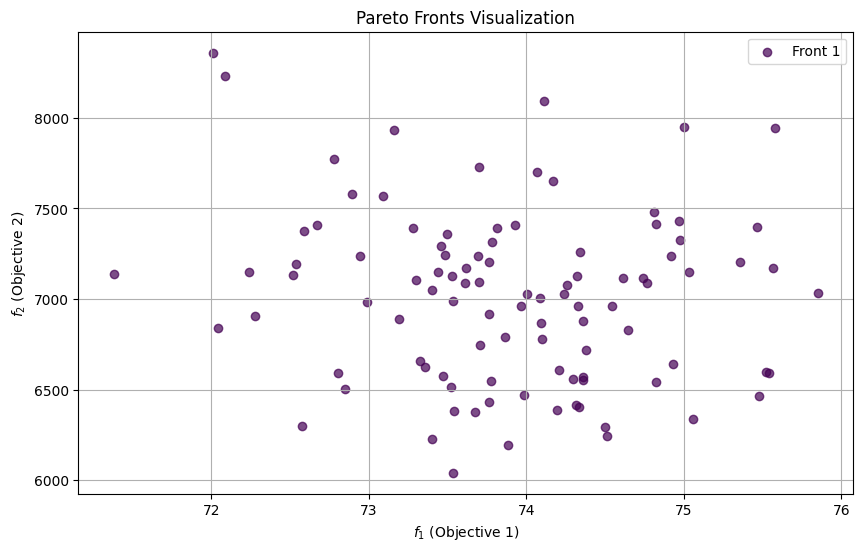

In [14]:
# LOOK AT THIS CELL (cell below is AI generated)
import numpy as np
import matplotlib.pyplot as plt
import math
def objective_functions(H, Q):
   # f1 = H + 1
   # f2 = (H-2) ** 2
    #f3 = H + Q
    U_1 = 51388 * (0.53 * (H - 74.7) - 0.7 * Q ** 2) if H >= 74.7 else 0
    C_1 = 51388*(0.05*(H - 74.9) ** 2) if H >= 74.9 else 0
    f1 = -(U_1 - C_1)

    # f2: Yield function of people managing docks (near Montreal harbor)
    f2 = -np.exp(-10.26 * abs(H - 73.56)) + 3.45 * Q**2

    # f3: Yield function of environmentalists
    f3 = -np.exp(-0.76 * (H - 74.83))

    # f4: Yield function of property owners on the shores of Lake Ontario
    f4 = -np.exp(-14.79 * abs(H - 74.56) - 3.68 * abs(Q - 7256)**2)

    # f5: Yield function of recreational boaters and fishing boats
    f5 = -np.exp(-5.89 * abs(H - 74.56) - 2.74 * abs(Q - 7256)**2)

    # f6: Yield function of hydro-power generation companies
    f6 = -46.35 * H

    # Return all objectives as a numpy array
    return np.array([f1, f2, f3, f4, f5, f6])

# Initialize population
def create_population(pop_size, n_var):
    return np.random.rand(pop_size, n_var) * 10 - 5

# Non-dominated sorting function
def non_dominated_sorting(population):
    pop_size = len(population)
    fronts = [[]]
    domination_counts = np.zeros(pop_size, dtype=int)
    dominated_solutions = [[] for _ in range(pop_size)]
    ranks = np.zeros(pop_size, dtype=int)

    for i in range(pop_size):
        for j in range(pop_size):
            if i != j:  # Skip self-comparison
                obj_i = objective_functions(*population[i])
                obj_j = objective_functions(*population[j])
                print("obj i: ", obj_i, "obj j", obj_j)
                if np.all(obj_i <= obj_j) and np.any(obj_i < obj_j):  # i dominates j
                    dominated_solutions[i].append(j)
                elif np.all(obj_j < obj_i) and np.any(obj_j < obj_i):  # j dominates i
                    domination_counts[i] += 1

        # If no solutions dominate i, it's part of the first Pareto front
        if domination_counts[i] == 0:
            ranks[i] = 0
            fronts[0].append(i)
    i = 0
    while fronts[i]:
        next_front = []
        for p in fronts[i]:
            for q in dominated_solutions[p]:
                domination_counts[q] -= 1
                if domination_counts[q] == 0:
                    ranks[q] = i + 1
                    next_front.append(q)
        i += 1
        fronts.append(next_front)

    return ranks, fronts[:-1]

pop_size = 100
n_var = 2
population = create_population(pop_size, n_var)

# Parameters for Lake Ontario simulation
H_mean = 74  # Average water level in feet
H_std = 1 # Standard deviation in feet (adjust for variability)
Q_mean = 7000  # Average flow rate in cubic meters per second
Q_std = 500  # Standard deviation for flow rate (adjust for variability)

# Number of samples to simulate
pop_size = 100
np.random.seed(42)
# Simulate the population of H and Q
H_values = np.random.normal(H_mean, H_std, pop_size)
Q_values = np.random.normal(Q_mean, Q_std, pop_size)
# Combine H and Q values into a population array
population_2 = np.vstack((H_values, Q_values)).T
print(population_2)

# Perform non-dominated sorting
ranks, fronts = non_dominated_sorting(population_2)
colors = plt.cm.viridis(np.linspace(0, 1, len(fronts)))
plt.figure(figsize=(10, 6))
for i, front in enumerate(fronts):
    solutions = population_2[front]
    plt.scatter(solutions[:, 0], solutions[:, 1], color=colors[i], label=f'Front {i + 1}', alpha=0.7)

print(ranks, fronts)

plt.title('Pareto Fronts Visualization')
plt.xlabel('$f_1$ (Objective 1)')
plt.ylabel('$f_2$ (Objective 2)')
plt.legend()
plt.grid(True)
plt.show()